In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.filters import sobel
from skimage.segmentation import watershed
from skimage.measure import label
from skimage.color import label2rgb
from scipy import ndimage as ndi

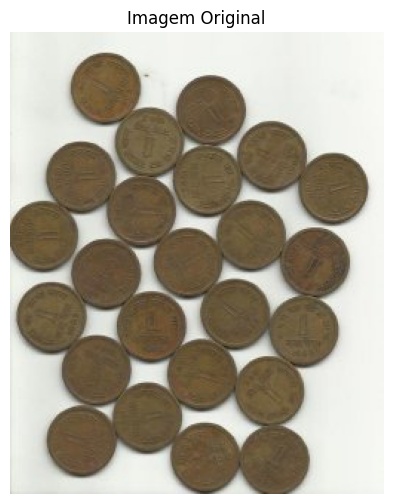

In [2]:
# Carregar a imagem
image = io.imread('../images/water_coins.jpg')
rgb_image = image.copy()

# Exibir a imagem original
plt.figure(figsize=(8, 6))
plt.imshow(rgb_image)
plt.title('Imagem Original')
plt.axis('off')
plt.show()

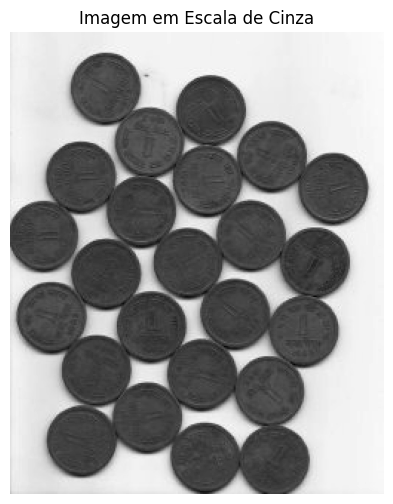

In [3]:
# Converter para escala de cinza
gray_image = color.rgb2gray(image)

# Exibir a imagem em escala de cinza
plt.figure(figsize=(8, 6))
plt.imshow(gray_image, cmap='gray')
plt.title('Imagem em Escala de Cinza')
plt.axis('off')
plt.show()

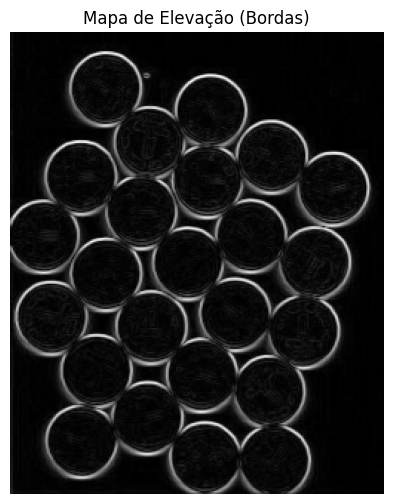

In [5]:
# Aplicar filtro Sobel para obter bordas
elevation_map = sobel(gray_image)

# Exibir o mapa de elevação (bordas)
plt.figure(figsize=(8, 6))
plt.imshow(elevation_map, cmap='gray')
plt.title('Mapa de Elevação (Bordas)')
plt.axis('off')
plt.show()

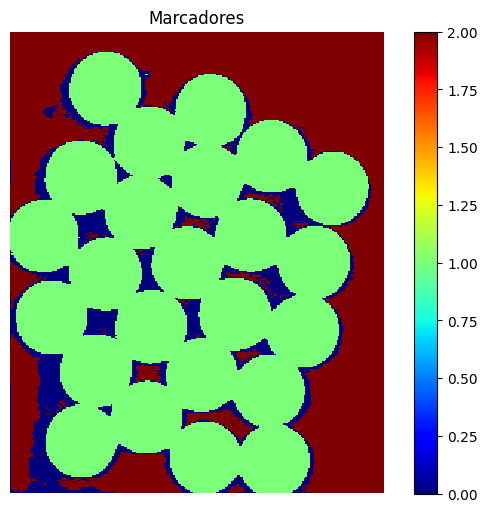

In [6]:
# Marcar as regiões onde sabemos (fundo e frente segura)
markers = np.zeros_like(gray_image, dtype=np.uint)
markers[gray_image < 0.7] = 1  # Fundo seguro
markers[gray_image > 0.9] = 2  # Frente segura

# Exibir os marcadores
plt.figure(figsize=(8, 6))
plt.imshow(markers, cmap='jet', interpolation='nearest')
plt.title('Marcadores')
plt.colorbar()
plt.axis('off')
plt.show()

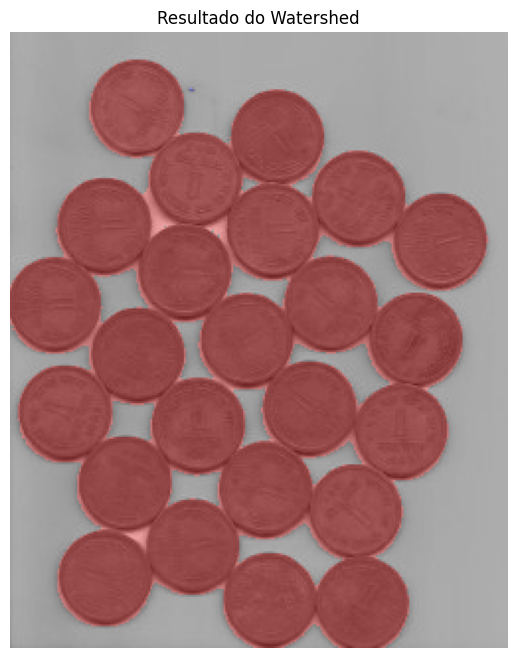

In [8]:
# Aplicar o watershed e rotular os componentes conectados
segmentation = watershed(elevation_map, markers)
labels = label(segmentation == 1)

# Exibir o resultado do watershed
plt.figure(figsize=(10, 8))
plt.imshow(label2rgb(labels, image=rgb_image, bg_label=0))
plt.title('Resultado do Watershed')
plt.axis('off')
plt.show()

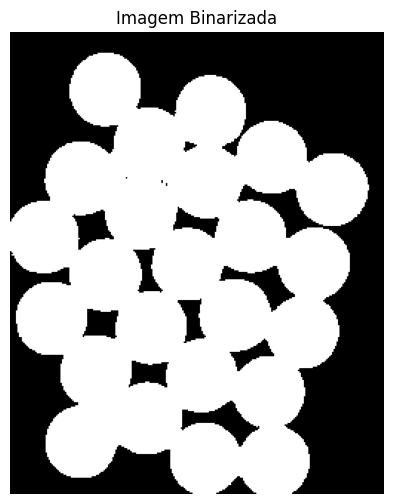

In [9]:
# Binarizar a imagem resultante
binary_image = labels == 1

# Exibir a imagem binarizada
plt.figure(figsize=(8, 6))
plt.imshow(binary_image, cmap='gray')
plt.title('Imagem Binarizada')
plt.axis('off')
plt.show()